# Towards a better understanding of $\Sigma = (I_d - ||\Phi||) C (I_d - ||\Phi||^\top)$

In [128]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from mlpp.hawkesnoparam.estim import Estim
import mlpp.pp.hawkes as hk
import whma.simulation as simu
from mlpp.base.utils import TimeFunction
from whma.metrics import rel_err, rank_corr

## $d$ = 2 or $d$ = 3

In [142]:
# simulation of Hawkes processes
d = 2
if d == 2:
    mu = np.array([0.00002, 0.00003])
    mus = simu.simulate_mu(d, mu=mu)
    Alpha_truth = np.array(
    [[0.4, 0.3],
    [0.4, 0.3]])
    Beta = np.array(
    [[0.8, 0.2],
    [0.5, 0.1]])
elif d == 3:
    mu = np.array([0.2, 0.3, 0.1])
    mus = simu.simulate_mu(d, mu=mu)
    Alpha_truth = np.array(
    [[0., 0.2, 0.5],
    [0., 0.0, 0.],
    [0., 0.0, 0.]])
    Beta = np.array([
            [0.1, 0.2, 0.1], 
            [0.2, 0.1, 0.3],
            [0., 0.2, 0.1]
        ])

In [143]:
_, s, _ = np.linalg.svd(Alpha_truth)
print(s.max())
assert s.max() < 1, "Alpha_truth cannot generate a stable Hawkes process"

0.707106781187


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


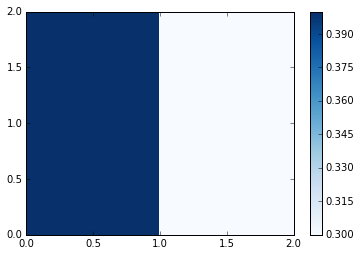

In [144]:
plt.pcolor(Alpha_truth[::-1],cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
plt.close()

In [145]:
kernels = [[hk.HawkesKernelExp(a, b) for (a, b) in zip(a_list, b_list)] for (a_list, b_list) in zip(Alpha_truth, Beta)]
h = hk.Hawkes(kernels=kernels, mus=list(mus))
h.simulate(100000)
estim = Estim(h, n_threads=8)

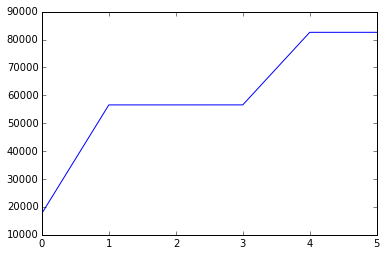

In [148]:
plt.plot(h.get_full_process()[1])

In [149]:
from whma.solver import admm
import whma.prox as prox
X0 = np.eye(d)
#X0 = np.ones(d**2).reshape(d,d)
rho = 0.01
maxiter = 10000

In [150]:
# main step
X_ = admm(estim, prox.l1, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  3.21316160798e-09
||X2 - X_3|| =  2.18547620945e-16
||U1|| =  0.000451644578418
||U2|| =  1.45606782057e-06
||U3|| =  2.18547620945e-16
||U4|| =  0.0399986282446
||U5|| =  0.0231346933607


In [151]:
print("RelErr = ", rel_err(Alpha_truth, X_))
print("RankCorr = ", rank_corr(Alpha_truth, X_))

RelErr =  0.447701727134
RankCorr =  0.158655260369


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


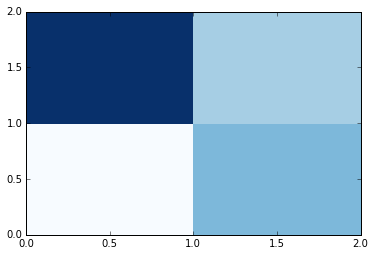

In [152]:
plt.pcolor(X_[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [153]:
X_

array([[ 0.25299518,  0.17844181],
       [ 0.13868596,  0.19055526]])

In [154]:
Alpha_truth

array([[ 0.4,  0.3],
       [ 0.4,  0.3]])

In [155]:
Beta

array([[ 0.8,  0.2],
       [ 0.5,  0.1]])

In [141]:
0.5*(Alpha_truth+Alpha_truth.T)

array([[ 0.4 ,  0.35],
       [ 0.35,  0.3 ]])